# Instructions I wrote for data engineers to get started with the model in flask

## Instructions on how to get the Pickle file working correctly

In [15]:
# Import the data
import pandas as pd
import numpy as np
dataset00 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vSFqeUFGZwH52bU-IepHfp2xRD3A0asGpGJRd3jaJYA4PwAmUju-5CmnepyBAvc64rY6gXwn2nUQG0e/pub?output=csv')
dataset10 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vR-Sc2ksuQCaZmH_Hy90bhCCP13AOVlBFAMRNwVYgEcT3RO-0UimxD9Loi5KVDOnurxvBoteW-whOWp/pub?output=csv')
dataset60 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vTPxGmOZVXdAYr2D5_ml_3YRXorUVarxlTQ4bYzews8YXWSY8ArdFAyxffvm8gmI-FxMr_8vJtCK_Y-/pub?output=csv')
dataset70 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vTINdcUA6cKJyHJS76NrcXPLbX_jFjt5S4pNIdAKw-4GF1w8ngBeorLrAPEYxSqgnxE9MybmzQ9NYXK/pub?output=csv')
dataset80 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vR5LNcY8trkxu8vIJHf8Ha0vDO9Xz2k2M7UCdEGhaJxz9vnB_SqET9fy88icZwIjPKeK8USi05_0zii/pub?output=csv')
dataset90 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRFUiB5RX_2qMQuZSuP-u_wQvjqlaSOTeKY4uGjwfeoGTgZUCesq46xlYjLqi4vmN-VQ4zK0Zm-jXmw/pub?output=csv') 

In [16]:
# Combine the data together into one df
frames = [dataset60, dataset70, dataset80, dataset90, dataset00, dataset10]
df = pd.concat(frames, ignore_index=True)

In [17]:
# Drop target column
df = df.drop(['target'], axis=1)
# drop duplicates of uri
df = df.drop_duplicates("uri")

In [18]:
# Create X_train y_train splits
X_train = df.drop(['track', 'artist',  'uri'], axis=1)
y_train = df['uri']

In [19]:
# Fit X_train on a StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [20]:
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7
41102,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8
41103,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7
41104,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14


In [21]:
# Scale the model parameters in the form of X_train
# This is the first row of the dataframe as an example
testing = scaler.transform([[0.531,0.422,10,-7.081,1,0.0571,0.219,0.0198,0.0608,0.579,188.056,280200,4,43.01127,13]])

In [22]:
# load the pickled model
# Make sure that the file is in the working directory
from joblib import load
model = load('model.joblib')

In [23]:
# plug in the standardized parameters into the model
# The first array is the euclidean distance (Not important)
# The second array is the indexes of each prediction
model.kneighbors(testing)

(array([[1.11988346, 1.17041417, 1.35843983, 1.40141115, 1.48600126]]),
 array([[25351, 23605, 19874,   585, 23341]]))

In [24]:
# Grab the uri of each index prediction
test123 = [y_train[25351], y_train[23605], y_train[19874], y_train[585], y_train[23341]]

In [25]:
# What it should look like
test123

['spotify:track:4gAU0cHQJFxj1n2ZDiEIzG',
 'spotify:track:6lah2pPQVdTsfoMSHkyYmn',
 'spotify:track:6GjZx56DlDIX75KoM4hRf9',
 'spotify:track:01slhbkp1vxXKC9lDO6zxp',
 'spotify:track:3nJvdMhOmRW4cRLw0NN7qC']

## If you want to check the track names and other info vvv

In [26]:
# Grab the raw df and filter out everything besides the predicted indexes
# You need the reindex to put it in the correct order
df[df['uri'].isin(test123)].reindex([25351,23605,19874,585,23341])

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
25351,Step On,Happy Mondays,spotify:track:4gAU0cHQJFxj1n2ZDiEIzG,0.595,0.889,7,-7.163,1,0.0332,0.000011,0.551000,0.1180,0.450,105.153,318507,4,32.13214,11
23605,Never Leave Me Alone,Nate Dogg Featuring Snoop Doggy Dogg,spotify:track:6lah2pPQVdTsfoMSHkyYmn,0.821,0.549,8,-3.591,1,0.0371,0.043700,0.000000,0.0737,0.963,100.023,360507,4,30.97036,16
19874,I Believe In You,Stryper,spotify:track:6GjZx56DlDIX75KoM4hRf9,0.429,0.483,8,-11.211,1,0.0261,0.157000,0.000011,0.0775,0.254,77.759,197333,4,38.24505,8
585,"Mercy, Mercy, Mercy",Marlena Shaw,spotify:track:01slhbkp1vxXKC9lDO6zxp,0.482,0.484,10,-8.987,1,0.0468,0.412000,0.000000,0.0672,0.560,170.548,186240,4,34.36564,11
23341,Sluttering (May 4th),Jawbreaker,spotify:track:3nJvdMhOmRW4cRLw0NN7qC,0.433,0.983,9,-5.415,1,0.0790,0.003380,0.000454,0.2280,0.632,158.985,254107,4,44.02017,10


## If you didn't see the post I created yesterday on were to get each parameter, this is where you get each one

picklemodel.kneighbors([[danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chrous_hit, sections]])

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ contains:
duration_ms, key, mode, time_signature, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence, tempo


https://developer.spotify.com/console/get-audio-analysis-track/?id=06AKEBrKUckW0KREUWRnvT contains:
chorus_hit, sections

    Chorus hit is the "start" value of the third section in "sections"

    sections is the number of "sections" in the json
    
The Spotipy library could help you with collecting all this data for you

https://github.com/plamere/spotipy

### Testing some things

In [7]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [8]:
X_train = scaler.transform(X_train)

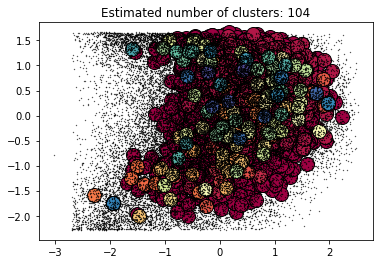

In [14]:
db = DBSCAN(eps=1, min_samples=5).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_train[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_train[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [9]:
set(db.labels_)

NameError: name 'db' is not defined